<a href="https://colab.research.google.com/github/khalidhossain159357/tic-tac-toe/blob/main/project_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
%pip install pyreadstat

In [256]:
df = pd.read_spss('/content/drive/MyDrive/Datasets/socio economic & demographic  factor from IR.SAV')

In [257]:
df.head()

,V013,V024,V025,V106,V119,V130,V190,V218,V312,V384A,...,V384D,V384E,V384F,V384G,V384H,V501,V714,V717,V729,V730
0,45-49,Barishal,Urban,Higher,Yes,Islam,Richest,2.0,Not using,No,...,No,No,No,Yes,No,Married,No,Not working,Higher,55.0
1,45-49,Barishal,Urban,Secondary,Yes,Islam,Richer,2.0,Not using,No,...,No,No,No,No,No,Married,No,Not working,Incomplete secondary,55.0
2,40-44,Barishal,Urban,Primary,Yes,Islam,Richer,2.0,Pill,No,...,No,No,No,No,No,Married,No,Not working,Complete primary,45.0
3,45-49,Barishal,Urban,Primary,Yes,Islam,Richest,4.0,Not using,No,...,No,No,No,Yes,No,Married,Yes,Household and domestic,No education,64.0
4,35-39,Barishal,Urban,No education,Yes,Hinduism,Richer,1.0,Periodic abstinence,No,...,No,No,No,No,No,Married,Yes,Unskilled manual,No education,51.0


In [258]:
df.shape

(19987, 22)

In [259]:
column_mapping = {
    'V013': 'Age in 5-year groups',
    'V024': 'Division',
    'V025': 'Type of place of residence',
    'V106': 'Highest educational level',
    'V119': 'Household has: electricity',
    'V130': 'Religion',
    'V190': 'Wealth index combined',
    'V218': 'Number of living children',
    'V312': 'Current contraceptive method',
    'V384A': 'Heard family planning on radio last few months',
    'V384B': 'Heard family planning on TV last few months',
    'V384C': 'Heard family planning in newspaper/magazine last few months',
    'V384D': 'Heard family planning by text messages on mobile phone',
    'V384E': 'Seen about family planning on facebook, twitter, instagram, others',
    'V384F': 'Seen about family planning on poster, brochure',
    'V384G': 'Seen about family planning on outdoor sign, billboard',
    'V384H': 'Heard family planning at community meetings events',
    'V501': 'Current marital status',
    'V714': 'Respondent currently working',
    'V717': 'Respondent\'s occupation (grouped)',
    'V729': 'Husband/partner\'s educational attainment',
    'V730': 'Husband/partner\'s age'
}

df.rename(columns=column_mapping, inplace=True)
df.head()

,Age in 5-year groups,Division,Type of place of residence,Highest educational level,Household has: electricity,Religion,Wealth index combined,Number of living children,Current contraceptive method,Heard family planning on radio last few months,...,Heard family planning by text messages on mobile phone,"Seen about family planning on facebook, twitter, instagram, others","Seen about family planning on poster, brochure","Seen about family planning on outdoor sign, billboard",Heard family planning at community meetings events,Current marital status,Respondent currently working,Respondent's occupation (grouped),Husband/partner's educational attainment,Husband/partner's age
0,45-49,Barishal,Urban,Higher,Yes,Islam,Richest,2.0,Not using,No,...,No,No,No,Yes,No,Married,No,Not working,Higher,55.0
1,45-49,Barishal,Urban,Secondary,Yes,Islam,Richer,2.0,Not using,No,...,No,No,No,No,No,Married,No,Not working,Incomplete secondary,55.0
2,40-44,Barishal,Urban,Primary,Yes,Islam,Richer,2.0,Pill,No,...,No,No,No,No,No,Married,No,Not working,Complete primary,45.0
3,45-49,Barishal,Urban,Primary,Yes,Islam,Richest,4.0,Not using,No,...,No,No,No,Yes,No,Married,Yes,Household and domestic,No education,64.0
4,35-39,Barishal,Urban,No education,Yes,Hinduism,Richer,1.0,Periodic abstinence,No,...,No,No,No,No,No,Married,Yes,Unskilled manual,No education,51.0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Age in 5-year groups                                                19987 non-null  category
 1   Division                                                            19987 non-null  category
 2   Type of place of residence                                          19987 non-null  category
 3   Highest educational level                                           19987 non-null  category
 4   Household has: electricity                                          19987 non-null  category
 5   Religion                                                            19987 non-null  category
 6   Wealth index combined                                               19987 non-null  category
 7   Numb

In [261]:
df.isnull().sum()

,0
Age in 5-year groups,0
Division,0
Type of place of residence,0
Highest educational level,0
Household has: electricity,0
Religion,0
Wealth index combined,0
Number of living children,0
Current contraceptive method,0
Heard family planning on radio last few months,0


In [262]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Husband/partner's age    1000
dtype: int64


In [263]:
%pip install fancyimpute

In [264]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

age_to_impute = df[['Husband/partner\'s age']]

imputed_age = imputer.fit_transform(age_to_impute)

df['Husband/partner\'s age'] = imputed_age

print(df.isnull().sum()['Husband/partner\'s age'])

0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Age in 5-year groups                                                19987 non-null  category
 1   Division                                                            19987 non-null  category
 2   Type of place of residence                                          19987 non-null  category
 3   Highest educational level                                           19987 non-null  category
 4   Household has: electricity                                          19987 non-null  category
 5   Religion                                                            19987 non-null  category
 6   Wealth index combined                                               19987 non-null  category
 7   Numb

In [266]:
df.isnull().sum()

,0
Age in 5-year groups,0
Division,0
Type of place of residence,0
Highest educational level,0
Household has: electricity,0
Religion,0
Wealth index combined,0
Number of living children,0
Current contraceptive method,0
Heard family planning on radio last few months,0


In [267]:
df.shape

(19987, 22)

In [268]:
category_data = []
for col in df.select_dtypes(include='category').columns:
    category_data.append({'Variable': col, 'Categories': df[col].unique().tolist()})

categories_df = pd.DataFrame(category_data)
display(categories_df)

,Variable,Categories
0,Age in 5-year groups,"[45-49, 40-44, 35-39, 15-19, 20-24, 30-34, 25-29]"
1,Division,"[Barishal, Chattogram, Dhaka, Khulna, Mymensin..."
2,Type of place of residence,"[Urban, Rural]"
3,Highest educational level,"[Higher, Secondary, Primary, No education]"
4,Household has: electricity,"[Yes, Not a dejure resident, No]"
5,Religion,"[Islam, Hinduism, Buddhist, Christianity, Others]"
6,Wealth index combined,"[Richest, Richer, Middle, Poorer, Poorest]"
7,Current contraceptive method,"[Not using, Pill, Periodic abstinence, Male co..."
8,Heard family planning on radio last few months,"[No, Yes]"
9,Heard family planning on TV last few months,"[Yes, No]"


In [269]:
replacements = {
    'yes': 'Yes',
    'Not a dejure resident': 'No',
    'no': 'No'
}

df['Household has: electricity'] = df['Household has: electricity'].replace(replacements)

# Ensure the column remains a categorical type with updated categories
df['Household has: electricity'] = df['Household has: electricity'].astype('category')

print("New categories for 'Household has: electricity' after transformation:")
print(df['Household has: electricity'].unique())

New categories for 'Household has: electricity' after transformation:
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


/tmp/ipython-input-2349751243.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Household has: electricity'] = df['Household has: electricity'].replace(replacements)


In [270]:
replacements_religion = {
    'Buddhist': 'Others',
    'Christianity': 'Others',
    'Others': 'Others'
}

df['Religion'] = df['Religion'].replace(replacements_religion)

# Ensure the column remains a categorical type with updated categories
df['Religion'] = df['Religion'].astype('category')

print("New categories for 'Religion' after transformation:")
print(df['Religion'].unique())

New categories for 'Religion' after transformation:
['Islam', 'Hinduism', 'Others']
Categories (3, object): ['Hinduism', 'Islam', 'Others']


/tmp/ipython-input-442843020.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Religion'] = df['Religion'].replace(replacements_religion)


In [271]:
replacements_wealth = {
    'Richest': 'Rich',
    'Richer': 'Rich',
    'Middle': 'Middle',
    'Poorer': 'Poor',
    'Poorest': 'Poor'
}

df['Wealth index combined'] = df['Wealth index combined'].replace(replacements_wealth)

# Ensure the column remains a categorical type with updated categories
df['Wealth index combined'] = df['Wealth index combined'].astype('category')

print("New categories for 'Wealth index combined' after transformation:")
print(df['Wealth index combined'].unique())

New categories for 'Wealth index combined' after transformation:
['Rich', 'Middle', 'Poor']
Categories (3, object): ['Middle', 'Poor', 'Rich']


/tmp/ipython-input-813025081.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Wealth index combined'] = df['Wealth index combined'].replace(replacements_wealth)


In [272]:
if 'Current contraceptive method' in df.columns:
    df['Current contraceptive method'] = df['Current contraceptive method'].apply(lambda x: 'Not using' if x == 'Not using' else 'Using')
else:
    print("Warning: 'Current contraceptive method' column not found, cannot update the variable.")

df['Current contraceptive method'] = df['Current contraceptive method'].astype('category')
print(df['Current contraceptive method'].unique())

['Not using', 'Using']
Categories (2, object): ['Not using', 'Using']


In [273]:
replacements_marital = {
    'Widowed': 'Not Married',
    'Divorced': 'Not Married',
    'No longer living together/separated': 'Not Married'
}

df['Current marital status'] = df['Current marital status'].replace(replacements_marital)

# Ensure the column remains a categorical type with updated categories
df['Current marital status'] = df['Current marital status'].astype('category')

print("New categories for 'Current marital status' after transformation:")
print(df['Current marital status'].unique())

New categories for 'Current marital status' after transformation:
['Married', 'Not Married']
Categories (2, object): ['Not Married', 'Married']


/tmp/ipython-input-70380770.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Current marital status'] = df['Current marital status'].replace(replacements_marital)


In [274]:
replacements_occupation = {
    'Not working': 'Unspecified',
    '': 'Unspecified', # Assuming an empty string might exist or should be treated as unspecified
    'Don\'t know': 'Unspecified',
    'Household and domestic': 'Unskilled manual',
    'Skilled manual': 'Employee',
    'Services': 'Employee',
    'Professional/technical/managerial': 'Employee',
    'Sales': 'Employee',
    'Agricultural - employee': 'Agricultural Workers',
    'Agricultural - self employed': 'Agricultural Workers'
}

df['Respondent\'s occupation (grouped)'] = df['Respondent\'s occupation (grouped)'].replace(replacements_occupation)

# Ensure the column remains a categorical type with updated categories
df['Respondent\'s occupation (grouped)'] = df['Respondent\'s occupation (grouped)'].astype('category')

print("New categories for 'Respondent\'s occupation (grouped)' after transformation:")
print(df['Respondent\'s occupation (grouped)'].unique())

New categories for 'Respondent's occupation (grouped)' after transformation:
['Unspecified', 'Unskilled manual', 'Employee', 'Agricultural Workers']
Categories (4, object): ['Agricultural Workers', 'Unspecified', 'Employee', 'Unskilled manual']


/tmp/ipython-input-3494301037.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Respondent\'s occupation (grouped)'] = df['Respondent\'s occupation (grouped)'].replace(replacements_occupation)


In [275]:
replacements_education = {
    'Higher': 'Higher Education',
    'Incomplete secondary': 'Primary Education',
    'Complete primary': 'Primary Education',
    'Don\'t know': 'No Education',
    'No education': 'No Education',
    'Incomplete primary': 'No Education',
    'Complete secondary': 'Secondary Education'
}

df['Husband/partner\'s educational attainment'] = df['Husband/partner\'s educational attainment'].replace(replacements_education)

# Ensure the column remains a categorical type with updated categories
df['Husband/partner\'s educational attainment'] = df['Husband/partner\'s educational attainment'].astype('category')

print("New categories for 'Husband/partner\'s educational attainment' after transformation:")
print(df['Husband/partner\'s educational attainment'].unique())

New categories for 'Husband/partner's educational attainment' after transformation:
['Higher Education', 'Primary Education', 'No Education', 'Secondary Education']
Categories (4, object): ['Primary Education', 'Secondary Education', 'No Education', 'Higher Education']


/tmp/ipython-input-3846699985.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Husband/partner\'s educational attainment'] = df['Husband/partner\'s educational attainment'].replace(replacements_education)


In [276]:
def categorize_children(num_children):
    if num_children == 0:
        return 'Zero'
    elif num_children == 1 or num_children == 2:
        return 'One or Two'
    elif num_children >= 3:
        return 'Three or More'
    else:
        # Handle any other possible values, e.g., NaNs or unexpected numbers
        return None

df['Number of living children'] = df['Number of living children'].apply(categorize_children)
df['Number of living children'] = df['Number of living children'].astype('category')

print("New categories for 'Number of living children' after transformation:")
print(df['Number of living children'].unique())

New categories for 'Number of living children' after transformation:
['One or Two', 'Three or More', 'Zero']
Categories (3, object): ['One or Two', 'Three or More', 'Zero']


In [277]:
category_data = []
for col in df.select_dtypes(include='category').columns:
    category_data.append({'Variable': col, 'Categories': df[col].unique().tolist()})

categories_df = pd.DataFrame(category_data)
display(categories_df)

,Variable,Categories
0,Age in 5-year groups,"[45-49, 40-44, 35-39, 15-19, 20-24, 30-34, 25-29]"
1,Division,"[Barishal, Chattogram, Dhaka, Khulna, Mymensin..."
2,Type of place of residence,"[Urban, Rural]"
3,Highest educational level,"[Higher, Secondary, Primary, No education]"
4,Household has: electricity,"[Yes, No]"
5,Religion,"[Islam, Hinduism, Others]"
6,Wealth index combined,"[Rich, Middle, Poor]"
7,Number of living children,"[One or Two, Three or More, Zero]"
8,Current contraceptive method,"[Not using, Using]"
9,Heard family planning on radio last few months,"[No, Yes]"


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Age in 5-year groups                                                19987 non-null  category
 1   Division                                                            19987 non-null  category
 2   Type of place of residence                                          19987 non-null  category
 3   Highest educational level                                           19987 non-null  category
 4   Household has: electricity                                          19987 non-null  category
 5   Religion                                                            19987 non-null  category
 6   Wealth index combined                                               19987 non-null  category
 7   Numb

In [279]:
df.shape

(19987, 22)

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = [
    'Age in 5-year groups', 'Division', 'Type of place of residence', 'Highest educational level',
    'Household has: electricity', 'Religion', 'Wealth index combined', 'Number of living children',
    'Heard family planning on radio last few months', 'Heard family planning on TV last few months',
    'Heard family planning in newspaper/magazine last few months', 'Heard family planning by text messages on mobile phone',
    'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on poster, brochure',
    'Seen about family planning on outdoor sign, billboard', 'Heard family planning at community meetings events',
    'Current marital status', 'Respondent currently working', 'Respondent\'s occupation (grouped)',
    'Husband/partner\'s educational attainment'
]

for col in categorical_columns:
    print(f"--- {col} ---")

    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    freq_table['Percentage'] = round((freq_table['Frequency'] / freq_table['Frequency'].sum()) * 100, 2)

    print(freq_table)
    print("\n")

--- Age in 5-year groups ---
  Age in 5-year groups  Frequency  Percentage
0                25-29       3539       17.71
1                30-34       3438       17.20
2                35-39       3362       16.82
3                20-24       3233       16.18
4                40-44       2561       12.81
5                45-49       2219       11.10
6                15-19       1635        8.18


--- Division ---
     Division  Frequency  Percentage
0       Dhaka       3028       15.15
1  Chattogram       2983       14.92
2      Khulna       2602       13.02
3    Rajshahi       2546       12.74
4     Rangpur       2399       12.00
5  Mymensingh       2156       10.79
6      Sylhet       2156       10.79
7    Barishal       2117       10.59


--- Type of place of residence ---
  Type of place of residence  Frequency  Percentage
0                      Rural      12980       64.94
1                      Urban       7007       35.06


--- Highest educational level ---
  Highest educational 

In [281]:
numerical_columns = ['Husband/partner\'s age']

for col in numerical_columns:
    print(f"--- {col} ---")

    # Descriptive statistics
    print(df[col].describe())
    print("\n")

--- Husband/partner's age ---
count    19987.000000
mean        39.726286
std         10.439450
min         15.000000
25%         32.000000
50%         39.726286
75%         46.000000
max         95.000000
Name: Husband/partner's age, dtype: float64




In [282]:
df['contraceptive_use_cat'] = df['Current contraceptive method'].apply(lambda x: 'Not using' if x == 'Not using' else 'Using')

df['contraceptive_use'] = df['contraceptive_use_cat'].map({'Not using': 0,'Using': 1}).astype(int)

In [283]:
from scipy.stats import chi2_contingency, chi2, spearmanr

In [284]:
dependent_variable = 'contraceptive_use'

independent_categorical_variables = [
    'Age in 5-year groups', 'Division', 'Type of place of residence', 'Highest educational level',
    'Household has: electricity', 'Religion', 'Wealth index combined', 'Number of living children',
    'Heard family planning on radio last few months', 'Heard family planning on TV last few months',
    'Heard family planning in newspaper/magazine last few months','Heard family planning by text messages on mobile phone',
    'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on poster, brochure',
    'Seen about family planning on outdoor sign, billboard', 'Heard family planning at community meetings events',
    'Current marital status', 'Respondent currently working', "Respondent's occupation (grouped)",
    "Husband/partner's educational attainment"
]

In [285]:
for col in independent_categorical_variables:
    print(f"\n--- Detailed Analysis for: {col} ---")

    # 3. Create a contingency table
    contingency_table = pd.crosstab(df[col], df[dependent_variable])

    # 4. Print the contingency table
    print("Contingency Table:")
    print(contingency_table)

    # 5. Perform a chi-square test for independence
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 6. Extract and print the chi-square statistic, degrees of freedom (df), and p-value
    print(f"\nChi-square Statistic: {chi2_stat:.4f}")
    print(f"Degrees of Freedom (df): {dof}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("The relationship is statistically significant (p < 0.05).")
    else:
        print("The relationship is not statistically significant (p >= 0.05).")



--- Detailed Analysis for: Age in 5-year groups ---
Contingency Table:
contraceptive_use        0     1
Age in 5-year groups            
15-19                  763   872
20-24                 1370  1863
25-29                 1317  2222
30-34                 1107  2331
35-39                  979  2383
40-44                  923  1638
45-49                 1283   936

Chi-square Statistic: 606.1016
Degrees of Freedom (df): 6
P-value: 0.0000
The relationship is statistically significant (p < 0.05).

--- Detailed Analysis for: Division ---
Contingency Table:
contraceptive_use     0     1
Division                     
Barishal            787  1330
Chattogram         1314  1669
Dhaka              1222  1806
Khulna              950  1652
Mymensingh          793  1363
Rajshahi            831  1715
Rangpur             777  1622
Sylhet             1068  1088

Chi-square Statistic: 236.4978
Degrees of Freedom (df): 7
P-value: 0.0000
The relationship is statistically significant (p < 0.05).

--- 

In [286]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, log_loss, classification_report, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [287]:
def run_logistic_regression(df, dependent_var, independent_vars):
    X = pd.get_dummies(df[independent_vars], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X = sm.add_constant(X)
    y = df[dependent_var].astype(int)

    model = sm.Logit(y, X).fit(disp=False, cov_type='HC3')

    results = pd.DataFrame({
        'Variable': model.params.index,
        'Estimate (β)': model.params.values,
        'Std. Error': model.bse.values,
        'z-value': model.tvalues.values,
        'p-value': model.pvalues.values,
        'Exp(β)': np.exp(model.params.values),
        'Lower 95% CI (Exp(β))': np.exp(model.conf_int()[0]),
        'Upper 95% CI (Exp(β))': np.exp(model.conf_int()[1])
    })

    return results, model


In [288]:
def model_fit_summary(model):
    print(f"Log-Likelihood: {model.llf:.3f}")
    print(f"Pseudo R²: {model.prsquared:.3f}")
    print(f"AIC: {model.aic:.3f}")


In [289]:
def logistic_accuracy(model, df, independent_vars, dependent_var='contraceptive_use'):
    X = pd.get_dummies(df[independent_vars], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X = sm.add_constant(X)
    y = df[dependent_var]
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return accuracy_score(y, y_pred)


In [290]:
def compute_vif(df, vars_list):
    X = pd.get_dummies(df[vars_list], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]


In [291]:
# Define predictor groups
demographic_vars = ['Age in 5-year groups', 'Division', 'Type of place of residence', 'Religion']
socio_vars = ['Highest educational level', 'Household has: electricity', 'Wealth index combined',
              'Respondent currently working', "Respondent's occupation (grouped)", "Husband/partner's educational attainment", 'Husband/partner\'s age']
reproductive_vars = ['Number of living children']
media_vars = ['Heard family planning on radio last few months', 'Heard family planning on TV last few months',
              'Heard family planning in newspaper/magazine last few months', 'Seen about family planning on poster, brochure',
              'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on outdoor sign, billboard',
              'Heard family planning at community meetings events']

# Fit models
demo_results, demo_model = run_logistic_regression(df, 'contraceptive_use', demographic_vars)
socio_results, socio_model = run_logistic_regression(df, 'contraceptive_use', socio_vars)
repro_results, repro_model = run_logistic_regression(df, 'contraceptive_use', reproductive_vars)
media_results, media_model = run_logistic_regression(df, 'contraceptive_use', media_vars)


In [292]:
# Define predictor groups
demographic_vars = ['Age in 5-year groups', 'Division', 'Type of place of residence', 'Religion']
socio_vars = ['Highest educational level', 'Household has: electricity', 'Wealth index combined',
              'Respondent currently working', "Respondent's occupation (grouped)", "Husband/partner's educational attainment", 'Husband/partner\'s age']
reproductive_vars = ['Number of living children']
media_vars = ['Heard family planning on radio last few months', 'Heard family planning on TV last few months',
              'Heard family planning in newspaper/magazine last few months', 'Seen about family planning on poster, brochure',
              'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on outdoor sign, billboard',
              'Heard family planning at community meetings events']

# Fit models
demo_results, demo_model = run_logistic_regression(df, 'contraceptive_use', demographic_vars)
socio_results, socio_model = run_logistic_regression(df, 'contraceptive_use', socio_vars)
repro_results, repro_model = run_logistic_regression(df, 'contraceptive_use', reproductive_vars)
media_results, media_model = run_logistic_regression(df, 'contraceptive_use', media_vars)


In [293]:
all_vars = demographic_vars + socio_vars + reproductive_vars + media_vars
final_results, final_model = run_logistic_regression(df, 'contraceptive_use', all_vars)


In [294]:
demo_acc = logistic_accuracy(demo_model, df, demographic_vars)
socio_acc = logistic_accuracy(socio_model, df, socio_vars)
repro_acc = logistic_accuracy(repro_model, df, reproductive_vars)
media_acc = logistic_accuracy(media_model, df, media_vars)
final_acc = logistic_accuracy(final_model, df, all_vars)


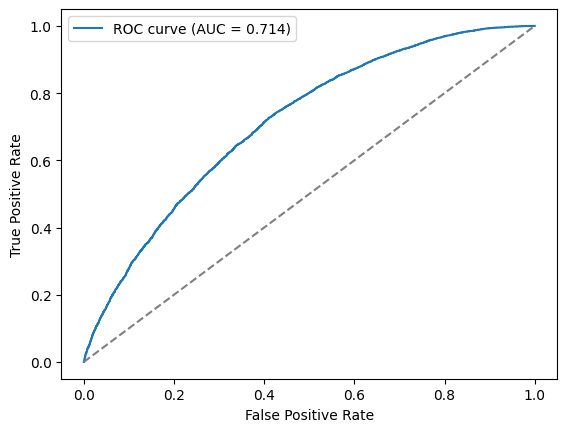

In [295]:
X_all = pd.get_dummies(df[all_vars], drop_first=True).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
X_all = sm.add_constant(X_all)
y_all = df['contraceptive_use']
y_pred_prob = final_model.predict(X_all)
fpr, tpr, _ = roc_curve(y_all, y_pred_prob)
auc_score = roc_auc_score(y_all, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(); plt.show()


In [296]:
X_ml = pd.get_dummies(df[all_vars], drop_first=True).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
y_ml = df['contraceptive_use']
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.3, random_state=42)


In [297]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=8)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_logloss = log_loss(y_test, rf_probs)


In [298]:
xgb_model = XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_logloss = log_loss(y_test, xgb_probs)


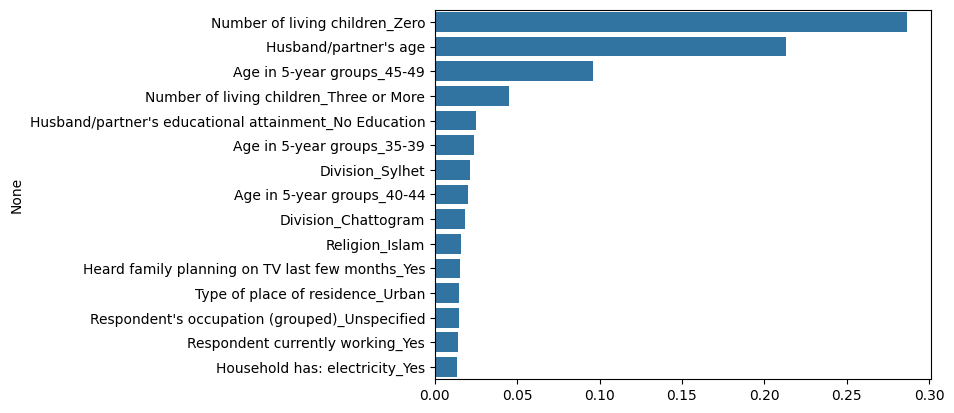

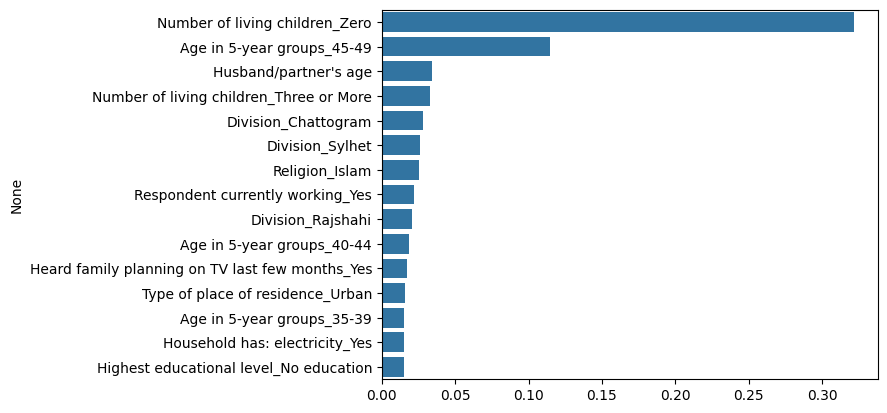

In [299]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:15]
sns.barplot(x=importances.values, y=importances.index); plt.show()
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:15]
sns.barplot(x=xgb_importances.values, y=xgb_importances.index); plt.show()


In [300]:
vif_results = compute_vif(df, all_vars)
print(vif_results.sort_values("VIF", ascending=False).head(15))

mfx = final_model.get_margeff(at='overall', method='dydx')
print(mfx.summary_frame().head(20))


                                         Variable       VIF
25  Respondent's occupation (grouped)_Unspecified  5.613482
7                      Age in 5-year groups_45-49  5.217530
24               Respondent currently working_Yes  4.946567
6                      Age in 5-year groups_40-44  4.908269
5                      Age in 5-year groups_35-39  4.793708
4                      Age in 5-year groups_30-34  4.064456
19              Highest educational level_Primary  3.592068
3                      Age in 5-year groups_25-29  3.521335
1                           Husband/partner's age  3.404178
20            Highest educational level_Secondary  3.306062
18         Highest educational level_No education  3.029496
2                      Age in 5-year groups_20-24  2.857962
9                                  Division_Dhaka  2.160572
8                             Division_Chattogram  2.143912
23                     Wealth index combined_Rich  2.035697
                                        

In [301]:
dependent_variable = 'contraceptive_use'
y_full = df[dependent_variable].astype(int)

groups = {"Without Demographics": socio_vars+reproductive_vars+media_vars,
          "Without Socio-Economic": demographic_vars+reproductive_vars+media_vars,
          "Without Reproductive": demographic_vars+socio_vars+media_vars,
          "Without Media": demographic_vars+socio_vars+reproductive_vars}

for label, vars_list in groups.items():
    X_temp = pd.get_dummies(df[vars_list], drop_first=True).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X_temp_const = sm.add_constant(X_temp)
    model = sm.Logit(y_full, X_temp_const).fit(disp=False)
    auc = roc_auc_score(y_full, model.predict(X_temp_const))
    print(f"{label} → AUC: {auc:.3f}, Log-Likelihood: {model.llf:.2f}, AIC: {model.aic:.2f}")

Without Demographics → AUC: 0.670, Log-Likelihood: -12281.63, AIC: 24611.26
Without Socio-Economic → AUC: 0.704, Log-Likelihood: -11948.74, AIC: 23949.48
Without Reproductive → AUC: 0.651, Log-Likelihood: -12658.70, AIC: 25393.40
Without Media → AUC: 0.711, Log-Likelihood: -11851.89, AIC: 23769.79


In [302]:
thresholds = np.arange(0.1, 0.9, 0.1)
results = []
for t in thresholds:
    y_pred = (y_pred_prob >= t).astype(int)
    sens = recall_score(y_full, y_pred)
    spec = (sum((y_pred==0)&(y_full==0))/sum(y_full==0))
    acc = accuracy_score(y_full, y_pred)
    results.append([t, acc, sens, spec])
sensitivity_df = pd.DataFrame(results, columns=['Threshold','Accuracy','Sensitivity','Specificity'])

In [303]:
dependent_variable = 'contraceptive_use'
y_full = df[dependent_variable].astype(int)

# Ensure X_full is defined with all_vars
all_vars = demographic_vars + socio_vars + reproductive_vars + media_vars
X_full = pd.get_dummies(df[all_vars], drop_first=True)
X_full = X_full.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

boot_auc = []
for i in range(50):
    X_res, y_res = resample(X_full, y_full, random_state=i)
    model = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=6)
    model.fit(X_res, y_res)
    boot_auc.append(roc_auc_score(y_res, model.predict_proba(X_res)[:,1]))

In [304]:
high_vif = vif_results[vif_results["VIF"]>10]["Variable"].tolist()
if high_vif:
    X_reduced = X_full_const.drop(columns=high_vif, errors='ignore')
    reduced_model = sm.Logit(y_full, X_reduced).fit(disp=False)


In [305]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
auc_lr = roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
rf = XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=6)
rf.fit(X_train, y_train)
auc_xgb = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])


In [306]:
tn, fp, fn, tp = confusion_matrix(y_full, (y_pred_prob>=0.5).astype(int)).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

# Youden's J Optimal Threshold
fpr, tpr, thresholds = roc_curve(y_full, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = (y_pred_prob>=optimal_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_full, y_pred_opt).ravel()
sensitivity_opt = tp/(tp+fn)
specificity_opt = tn/(tn+fp)


In [307]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, balanced_accuracy_score
from statsmodels.stats.proportion import proportion_confint

def logistic_model_metrics(model, df, independent_vars, dependent_var='contraceptive_use', threshold=0.5, ci_level=0.95):
    # Prepare design matrix
    X = pd.get_dummies(df[independent_vars], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X = sm.add_constant(X)
    y_true = df[dependent_var].astype(int)

    # Predict probabilities
    y_prob = model.predict(X)
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    # 95% CI for accuracy
    ci_low, ci_upp = proportion_confint(tp+tn, len(y_true), alpha=1-ci_level, method='wilson')

    prevalence = (tp+fn)/len(y_true)
    sensitivity = tp/(tp+fn) if (tp+fn)>0 else 0
    specificity = tn/(tn+fp) if (tn+fp)>0 else 0
    ppv = tp/(tp+fp) if (tp+fp)>0 else 0
    npv = tn/(tn+fn) if (tn+fn)>0 else 0
    balanced_acc = (sensitivity + specificity)/2
    roc_auc = roc_auc_score(y_true, y_prob)

    # No Information Rate: most frequent class proportion
    class_counts = y_true.value_counts()
    nir = class_counts.max()/len(y_true)

    # Kappa: Cohen's kappa
    po = accuracy
    pe = ((tp+fp)*(tp+fn) + (fn+tn)*(fp+tn)) / len(y_true)**2
    kappa = (po - pe)/(1 - pe) if (1-pe)!=0 else 0

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)

    return {
        'Accuracy': accuracy,
        '95% CI': (ci_low, ci_upp),
        'NIR': nir,
        'Kappa': kappa,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'PPV': ppv,
        'NPV': npv,
        'Prevalence': prevalence,
        'Balanced Accuracy': balanced_acc,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }


In [311]:
# Logistic Regression
logit_metrics = logistic_model_metrics(final_model, df, all_vars)

# Random Forest
rf_probs = rf_model.predict_proba(X_ml)[:,1]
rf_pred = (rf_probs >= 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_ml, rf_pred).ravel()
rf_metrics = {
    'Accuracy': accuracy_score(y_ml, rf_pred),
    '95% CI': proportion_confint(tp+tn, len(y_ml), alpha=0.05, method='wilson'),
    'NIR': y_ml.value_counts().max()/len(y_ml),
    'Kappa': (accuracy_score(y_ml, rf_pred) - (((tp+fp)*(tp+fn)+(fn+tn)*(fp+tn))/len(y_ml)**2))/(1-(((tp+fp)*(tp+fn)+(fn+tn)*(fp+tn))/len(y_ml)**2)),
    'Sensitivity': tp/(tp+fn),
    'Specificity': tn/(tn+fp),
    'PPV': tp/(tp+fp),
    'NPV': tn/(tn+fn),
    'Prevalence': (tp+fn)/len(y_ml),
    'Balanced Accuracy': (tp/(tp+fn) + tn/(tn+fp))/2,
    'ROC AUC': roc_auc_score(y_ml, rf_probs),
    'FPR': roc_curve(y_ml, rf_probs)[0],
    'TPR': roc_curve(y_ml, rf_probs)[1],
    'Thresholds': roc_curve(y_ml, rf_probs)[2]
}

# XGBoost
xgb_probs = xgb_model.predict_proba(X_ml)[:,1]
xgb_pred = (xgb_probs >= 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_ml, xgb_pred).ravel()
xgb_metrics = {
    'Accuracy': accuracy_score(y_ml, xgb_pred),
    '95% CI': proportion_confint(tp+tn, len(y_ml), alpha=0.05, method='wilson'),
    'NIR': y_ml.value_counts().max()/len(y_ml),
    'Kappa': (accuracy_score(y_ml, xgb_pred) - (((tp+fp)*(tp+fn)+(fn+tn)*(fp+tn))/len(y_ml)**2))/(1-(((tp+fp)*(tp+fn)+(fn+tn)*(fp+tn))/len(y_ml)**2)),
    'Sensitivity': tp/(tp+fn),
    'Specificity': tn/(tn+fp),
    'PPV': tp/(tp+fp),
    'NPV': tn/(tn+fn),
    'Prevalence': (tp+fn)/len(y_ml),
    'Balanced Accuracy': (tp/(tp+fn) + tn/(tn+fp))/2,
    'ROC AUC': roc_auc_score(y_ml, xgb_probs),
    'FPR': roc_curve(y_ml, xgb_probs)[0],
    'TPR': roc_curve(y_ml, xgb_probs)[1],
    'Thresholds': roc_curve(y_ml, xgb_probs)[2]
}

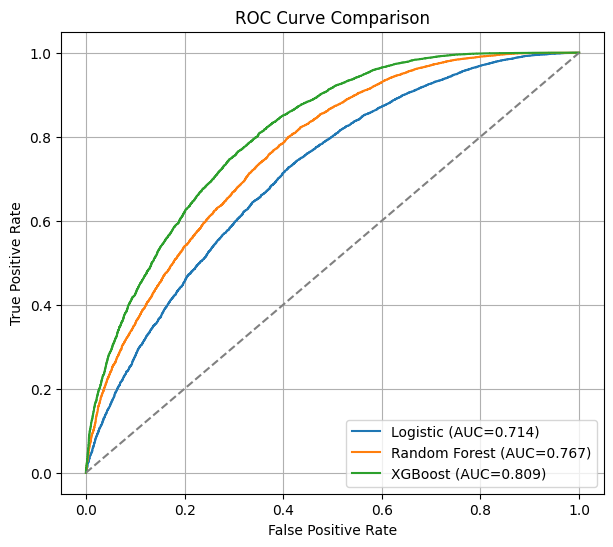

In [309]:
plt.figure(figsize=(7,6))
plt.plot(logit_metrics['FPR'], logit_metrics['TPR'], label=f'Logistic (AUC={logit_metrics["ROC AUC"]:.3f})')
plt.plot(rf_metrics['FPR'], rf_metrics['TPR'], label=f'Random Forest (AUC={rf_metrics["ROC AUC"]:.3f})')
plt.plot(xgb_metrics['FPR'], xgb_metrics['TPR'], label=f'XGBoost (AUC={xgb_metrics["ROC AUC"]:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(); plt.grid(True); plt.show()



=== Integrated Logistic Regression Model Performance ===
Accuracy: 0.689 (95% CI: 0.682 - 0.695)
No Information Rate (NIR): 0.613
Cohen's Kappa: 0.292
Sensitivity (Recall): 0.873
Specificity: 0.398
Positive Predictive Value (PPV): 0.696
Negative Predictive Value (NPV): 0.664
Prevalence: 0.613
Balanced Accuracy: 0.635
ROC-AUC: 0.714

=== Random Forest Model Performance ===
Accuracy: 0.725 (95% CI: 0.718 - 0.731)
No Information Rate (NIR): 0.613
Cohen's Kappa: 0.361
Sensitivity (Recall): 0.933
Specificity: 0.395
Positive Predictive Value (PPV): 0.709
Negative Predictive Value (NPV): 0.789
Prevalence: 0.613
Balanced Accuracy: 0.664
ROC-AUC: 0.767

=== XGBoost Model Performance ===
Accuracy: 0.756 (95% CI: 0.750 - 0.761)
No Information Rate (NIR): 0.613
Cohen's Kappa: 0.447
Sensitivity (Recall): 0.919
Specificity: 0.497
Positive Predictive Value (PPV): 0.743
Negative Predictive Value (NPV): 0.795
Prevalence: 0.613
Balanced Accuracy: 0.708
ROC-AUC: 0.809


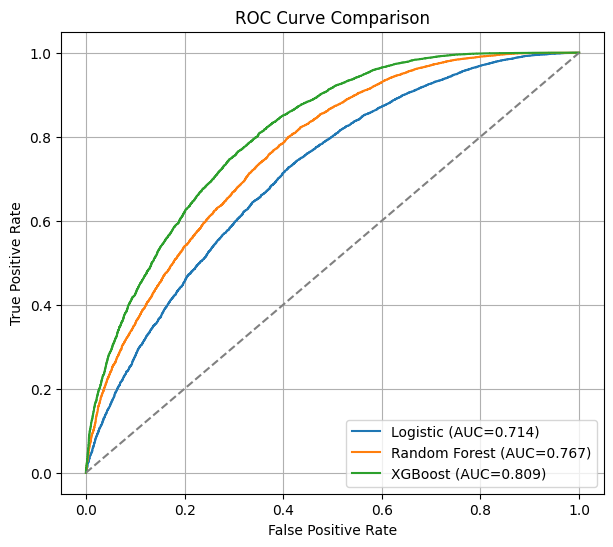

In [312]:
def print_model_metrics(name, metrics):
    print(f"\n=== {name} Model Performance ===")
    print(f"Accuracy: {metrics['Accuracy']:.3f} (95% CI: {metrics['95% CI'][0]:.3f} - {metrics['95% CI'][1]:.3f})")
    print(f"No Information Rate (NIR): {metrics['NIR']:.3f}")
    print(f"Cohen's Kappa: {metrics['Kappa']:.3f}")
    print(f"Sensitivity (Recall): {metrics['Sensitivity']:.3f}")
    print(f"Specificity: {metrics['Specificity']:.3f}")
    print(f"Positive Predictive Value (PPV): {metrics['PPV']:.3f}")
    print(f"Negative Predictive Value (NPV): {metrics['NPV']:.3f}")
    print(f"Prevalence: {metrics['Prevalence']:.3f}")
    print(f"Balanced Accuracy: {metrics['Balanced Accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['ROC AUC']:.3f}")

# Print metrics for all three models
print_model_metrics("Integrated Logistic Regression", logit_metrics)
print_model_metrics("Random Forest", rf_metrics)
print_model_metrics("XGBoost", xgb_metrics)

# Plot ROC curves
plt.figure(figsize=(7,6))
plt.plot(logit_metrics['FPR'], logit_metrics['TPR'], label=f'Logistic (AUC={logit_metrics["ROC AUC"]:.3f})')
plt.plot(rf_metrics['FPR'], rf_metrics['TPR'], label=f'Random Forest (AUC={rf_metrics["ROC AUC"]:.3f})')
plt.plot(xgb_metrics['FPR'], xgb_metrics['TPR'], label=f'XGBoost (AUC={xgb_metrics["ROC AUC"]:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(); plt.grid(True); plt.show()
